In [ ]:
!pip install langgraph langsmith

In [ ]:
!pip install langchain langchain_groq langchain_community

In [ ]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')
print(langsmith)

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


In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="llama-3.1-8b-instant")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x783d1fd4ee70>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x783d1fd4dd00>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot",chatbot)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [ ]:
graph=graph_builder.compile()

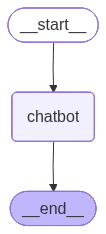

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content='Hello. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.011152063, 'prompt_time': 0.001901165, 'queue_time': 0.198115558, 'total_time': 0.013053228}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--eb0889d8-588a-4f94-8e8f-684d589bba06-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})}])
content='Hello. How can I assist you today?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.011152063, 'prompt_time': 0.001901165, 'queue_time': 0.198115558, 'total_time': 0.013053228}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_rea

dict_values([{'messages': AIMessage(content="Machine Learning (ML) is a subset of Artificial Intelligence (AI) that involves the use of algorithms and statistical models to enable machines to learn from data, make decisions, and improve their performance on a specific task without being explicitly programmed.\n\nMachine Learning involves training a model on a dataset, which enables the model to identify patterns, relationships, and anomalies in the data. The model can then use this knowledge to make predictions, classify objects, or generate new data.\n\nThere are several key aspects of Machine Learning:\n\n1. **Training**: The process of feeding data to a model to enable it to learn and improve its performance.\n2. **Model selection**: Choosing the right algorithm and model architecture for a specific problem.\n3. **Hyperparameter tuning**: Adjusting the model's parameters to optimize its performance.\n4. **Testing**: Evaluating the model's performance on a separate dataset to ensure 